In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-tweets/tweets/data_science.csv
/kaggle/input/data-science-tweets/tweets/data_analysis.csv
/kaggle/input/data-science-tweets/tweets/data_visualization.csv


In [2]:
import numpy as np
import pandas as pd
import time

# plot
import matplotlib.pyplot as plt
data = pd.read_csv('/kaggle/input/data-science-tweets/tweets/data_analysis.csv')

/tmp/ipykernel_34/3188351366.py:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/kaggle/input/data-science-tweets/tweets/data_analysis.csv')


In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
data['sentiment_score'] = 0.0

data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment_score
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,7443517384,7443517384,2010-01-06 20:45:45 IST,2010-01-06,20:45:45,530,44374617,washpostjobs,Washington Post Jobs,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0
39112,7426790266,7426790266,2010-01-06 08:40:39 IST,2010-01-06,08:40:39,530,6003222,solano,Víctor @Solano Franco,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0
39113,7416161173,7416161173,2010-01-06 03:04:30 IST,2010-01-06,03:04:30,530,27221778,jennpozner,Jennifer L. Pozner,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0
39114,7285952223,7285952223,2010-01-02 07:31:05 IST,2010-01-02,07:31:05,530,1147491,cocoy,Cocoy Dayao,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0


In [5]:
for index, row in data.iterrows():
    tweet = row['tweet']
    score = analyzer.polarity_scores(tweet)['compound']
    data.at[index,'sentiment_score'] = score

In [6]:
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment_score
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0772
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.3400
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.4019
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.7906
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,7443517384,7443517384,2010-01-06 20:45:45 IST,2010-01-06,20:45:45,530,44374617,washpostjobs,Washington Post Jobs,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000
39112,7426790266,7426790266,2010-01-06 08:40:39 IST,2010-01-06,08:40:39,530,6003222,solano,Víctor @Solano Franco,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000
39113,7416161173,7416161173,2010-01-06 03:04:30 IST,2010-01-06,03:04:30,530,27221778,jennpozner,Jennifer L. Pozner,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.3612
39114,7285952223,7285952223,2010-01-02 07:31:05 IST,2010-01-02,07:31:05,530,1147491,cocoy,Cocoy Dayao,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000


In [7]:
data['sentiment_class'] = 'neutral'

for index, row in data.iterrows():
    score = row['sentiment_score']
    if score > 0.05:
        data.at[index, 'sentiment_class'] = 'positive'
    elif score < -0.05:
        data.at[index, 'sentiment_class'] = 'negative'

data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment_score,sentiment_class
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0772,positive
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.3400,positive
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.4019,positive
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.7906,positive
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,7443517384,7443517384,2010-01-06 20:45:45 IST,2010-01-06,20:45:45,530,44374617,washpostjobs,Washington Post Jobs,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral
39112,7426790266,7426790266,2010-01-06 08:40:39 IST,2010-01-06,08:40:39,530,6003222,solano,Víctor @Solano Franco,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral
39113,7416161173,7416161173,2010-01-06 03:04:30 IST,2010-01-06,03:04:30,530,27221778,jennpozner,Jennifer L. Pozner,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.3612,positive
39114,7285952223,7285952223,2010-01-02 07:31:05 IST,2010-01-02,07:31:05,530,1147491,cocoy,Cocoy Dayao,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral


<AxesSubplot: xlabel='sentiment_score', ylabel='Count'>

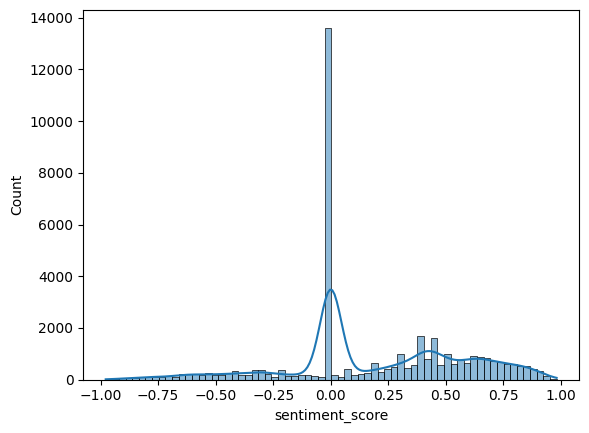

In [8]:
import seaborn as sns
sns.histplot(data=data, x="sentiment_score", kde=True)


In [9]:
positive_tweets = data[data["sentiment_class"] == "positive"]
negative_tweets = data[data["sentiment_class"] == "negative"]
neutral_tweets = data[data["sentiment_class"] == "neutral"]
print("Number of positive tweets: ", len(positive_tweets))
print("Number of negative tweets: ", len(negative_tweets))
print("Number of neutral tweets: ", len(neutral_tweets))

Number of positive tweets:  19765
Number of negative tweets:  5513
Number of neutral tweets:  13838


In [10]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
stop_words_t = set(stopwords.words('english'))
custom_stop_words = [ ".", ",", "!", "?", ":", ";", "-", "(", ")", "[", "]", "{", "}", "'", "/", "``", "''", "$", "%", "&", "*", "+", "<", "=", ">", "@", "^", "_", "|", "~"]
stop_words_t.update(custom_stop_words)
def clean_tweet(tweet):
    stop_words = set(stop_words_t)
    words = tweet.split()
    clean_words = [word for word in words if word.lower() not in stop_words and len(word) > 2]
    return ' '.join(clean_words)

In [12]:
data['clean_tweet'] = data['tweet'].apply(clean_tweet)
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment_score,sentiment_class,clean_tweet
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0772,positive,Join @SPJ_IC p.m. EDT Tuesday next #ICTalk @ch...
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.3400,positive,"READ: Resilience, hard work, perseverance paid..."
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.4019,positive,shift streaming impact movie-making? interesti...
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.7906,positive,(2/2) gain aptitude find better solutions real...
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral,Alexander Lukashenko still power Belarus despi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,7443517384,7443517384,2010-01-06 20:45:45 IST,2010-01-06,20:45:45,530,44374617,washpostjobs,Washington Post Jobs,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral,#Hiring Research-Data Analysis Intern Washingt...
39112,7426790266,7426790266,2010-01-06 08:40:39 IST,2010-01-06,08:40:39,530,6003222,solano,Víctor @Solano Franco,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral,[Interesante] 'The Cooperative Association Int...
39113,7416161173,7416161173,2010-01-06 03:04:30 IST,2010-01-06,03:04:30,530,27221778,jennpozner,Jennifer L. Pozner,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.3612,positive,Fellow writers: ever feel like head over-full ...
39114,7285952223,7285952223,2010-01-02 07:31:05 IST,2010-01-02,07:31:05,530,1147491,cocoy,Cocoy Dayao,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral,@newsycombinator: speed massive data analysis ...


In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(data['clean_tweet'], data['sentiment_class'], test_size=0.2, random_state=42)

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

In [16]:
clf = SVC(kernel='linear', C=1)
clf.fit(train_features, train_labels)

SVC(C=1, kernel='linear')

In [17]:
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment_score,sentiment_class,clean_tweet
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0772,positive,Join @SPJ_IC p.m. EDT Tuesday next #ICTalk @ch...
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.3400,positive,"READ: Resilience, hard work, perseverance paid..."
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.4019,positive,shift streaming impact movie-making? interesti...
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.7906,positive,(2/2) gain aptitude find better solutions real...
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral,Alexander Lukashenko still power Belarus despi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,7443517384,7443517384,2010-01-06 20:45:45 IST,2010-01-06,20:45:45,530,44374617,washpostjobs,Washington Post Jobs,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral,#Hiring Research-Data Analysis Intern Washingt...
39112,7426790266,7426790266,2010-01-06 08:40:39 IST,2010-01-06,08:40:39,530,6003222,solano,Víctor @Solano Franco,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral,[Interesante] 'The Cooperative Association Int...
39113,7416161173,7416161173,2010-01-06 03:04:30 IST,2010-01-06,03:04:30,530,27221778,jennpozner,Jennifer L. Pozner,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.3612,positive,Fellow writers: ever feel like head over-full ...
39114,7285952223,7285952223,2010-01-02 07:31:05 IST,2010-01-02,07:31:05,530,1147491,cocoy,Cocoy Dayao,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.0000,neutral,@newsycombinator: speed massive data analysis ...


In [20]:
pred_labels = clf.predict(test_features)

In [21]:
accuracy = accuracy_score(test_labels, pred_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8682259713701431


In [22]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(pred_labels, test_labels)
accuracy = (cm[0][0] + cm[1][1]) / len(pred_labels)
precision = cm[1][1] / (cm[0][1] + cm[1][1])
recall = cm[1][1]

In [25]:
print(accuracy)
print(precision)
print(recall)

0.3994120654396728
0.9823113207547169
2499
